In [24]:
#Import Necessary Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [25]:
# Load the dataset
data = pd.read_csv('spam.csv', encoding = 'ISO-8859-1') 
data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [26]:
#Print the first few rows of the dataframe
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [28]:
# Obtain statistical summaries of the DataFrame's numerical columns
data.describe()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [29]:
#Check Column Names
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [30]:
#Dropping the unwanted columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# Rename the columns of the DataFrame to 'Category' and 'Message'
data.columns = ['Class', 'Description']
data

,Class,Description
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
# Check for null values in the entire DataFrame
data.isnull().sum()

Class          0
Description    0
dtype: int64

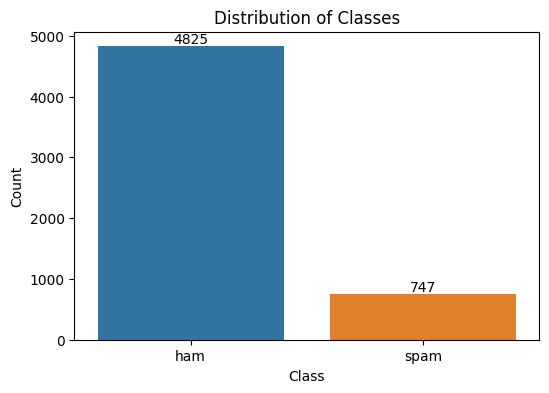

In [33]:
# Compute the count of each category and reset index to create a DataFrame
category_counts = data['Class'].value_counts().reset_index()
category_counts.columns = ['Class', 'Count']

# Set up the figure size
plt.figure(figsize=(6, 4))

# Create a bar plot for category counts
sns.barplot(x='Class', y='Count', data=category_counts)

# Label the x-axis and y-axis, and set the title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')

# Annotate each bar with its count value
for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


In [34]:
# Add a new column 'Output' with a value of 1 if 'Category' is 'spam', otherwise 0
data['Output']= data['Class'].apply(lambda x: 1 if x=='spam' else 0)
data

,Class,Description,Output
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [35]:
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import CountVectorizer   
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Description'], data['Output'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it into a count matrix
X_train_count = vectorizer.fit_transform(X_train)
X_train_count
# Fit the vectorizer on the training data and transform it into a count matrix
X_test_count = vectorizer.transform(X_test)
X_test_count

<1115x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 13941 stored elements in Compressed Sparse Row format>

In [36]:
# Create a pipeline with TF-IDF vectorizer and SVM classifier
from sklearn.pipeline import Pipeline  
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC(kernel='linear'))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC(kernel='linear'))])

In [37]:
# Evaluate the model
y_pred = pipeline.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Spam']))


              precision    recall  f1-score   support

  Legitimate       0.98      1.00      0.99       965
        Spam       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [38]:
# Test with custom SMS messages
custom_messages = [
    "Congratulations! You've won a $1000 gift card. Call now to claim your prize.",
    "Hey, are we still on for the meeting tomorrow?",
    "Urgent: Your account has been compromised. Click this link to secure your account.",
    "Can you send me the slides from the last presentation?"
]

predictions = pipeline.predict(custom_messages)
for message, prediction in zip(custom_messages, predictions):
    print(f"Message: {message}\nPrediction: {'Spam' if prediction == 1 else 'Not spam'} (Label: {prediction})\n")


Message: Congratulations! You've won a $1000 gift card. Call now to claim your prize.
Prediction: Spam (Label: 1)

Message: Hey, are we still on for the meeting tomorrow?
Prediction: Not spam (Label: 0)

Message: Urgent: Your account has been compromised. Click this link to secure your account.
Prediction: Spam (Label: 1)

Message: Can you send me the slides from the last presentation?
Prediction: Not spam (Label: 0)



In [39]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9829596412556054


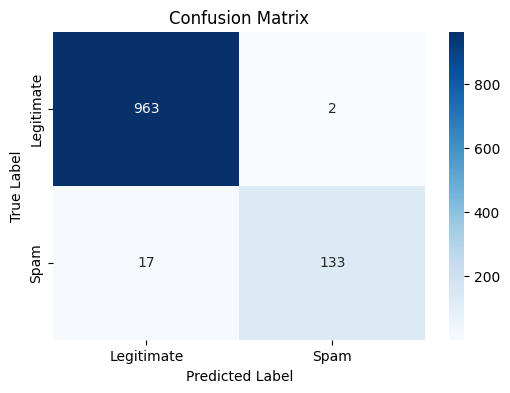

In [40]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Spam'], 
            yticklabels=['Legitimate', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()